In [79]:
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt

# Exercise 1

In [80]:
arith_gauss = np.zeros(10000)
arith_uniform = np.zeros(10000)

med_gauss = np.zeros(10000)
med_uniform = np.zeros(10000)

geo_gauss = np.zeros(10000)
geo_uniform = np.zeros(10000)

mode_gauss = np.zeros(10000)
mode_uniform = np.zeros(10000)

for i in range(10000):

    gauss = np.round(np.random.normal(loc = 170, scale = 10, size = 10), 1)
    uniform = np.round(np.random.uniform(low = 165, high = 175, size = 10), 1)
    
    arith_gauss[i] = np.mean(gauss)
    arith_uniform[i] = np.mean(uniform)
    
    med_gauss[i] = np.median(gauss)
    med_uniform[i] = np.median(uniform)
    
    geo_gauss[i] = gauss.prod()**(1/len(gauss))
    geo_uniform[i] = uniform.prod()**(1/len(gauss))
    
    if len(np.unique(gauss)) == len(gauss):
        mode_gauss[i] = np.nan
    else:
        mode_gauss[i] = st.mode(gauss)[0]
        
    if len(np.unique(uniform)) == len(uniform):
        mode_uniform[i] = np.nan
    else:
        mode_uniform[i] = st.mode(uniform)[0]

print('Gaussian Distribution:')
print('Arithmetic Mean: Bias - ', np.round(np.mean(arith_gauss)-170,3), ' cm ; Variance - ', np.round(np.var(arith_gauss),3), ' cm²')
print('Median: Bias - ', np.round(np.mean(med_gauss)-170,3), ' cm ; Variance - ', np.round(np.var(med_gauss),3), ' cm²')
print('Geometric Mean: Bias - ', np.round(np.mean(geo_gauss)-170,3), ' cm ; Variance - ', np.round(np.var(geo_gauss),3), ' cm²')
print('Mode: Bias - ', np.round(np.nanmean(mode_gauss)-170,3), ' cm ; Variance - ', np.round(np.nanvar(mode_gauss),3), ' cm²')

print('Uniform Distribution:')
print('Arithmetic Mean: Bias - ', np.round(np.mean(arith_uniform)-170,3), ' cm ; Variance - ', np.round(np.var(arith_uniform),3), ' cm²')
print('Median: Bias - ', np.round(np.mean(med_uniform)-170,3), ' cm ; Variance - ', np.round(np.var(med_uniform),3), ' cm²')
print('Geometric Mean: Bias - ', np.round(np.mean(geo_uniform)-170,3), ' cm ; Variance - ', np.round(np.var(geo_uniform),3), ' cm²')
print('Mode: Bias - ', np.round(np.nanmean(mode_uniform)-170,3), ' cm ; Variance - ', np.round(np.nanvar(mode_uniform),3), ' cm²')

Gaussian Distribution:
Arithmetic Mean: Bias -  0.007  cm ; Variance -  10.005  cm²
Median: Bias -  -0.003  cm ; Variance -  13.942  cm²
Geometric Mean: Bias -  -0.258  cm ; Variance -  10.044  cm²
Mode: Bias -  0.138  cm ; Variance -  52.281  cm²
Uniform Distribution:
Arithmetic Mean: Bias -  -0.002  cm ; Variance -  0.841  cm²
Median: Bias -  -0.01  cm ; Variance -  1.927  cm²
Geometric Mean: Bias -  -0.024  cm ; Variance -  0.841  cm²
Mode: Bias -  -0.253  cm ; Variance -  7.957  cm²


# Exercise 2

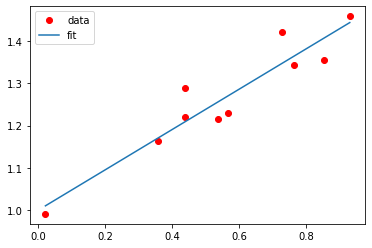

In [81]:
def f_y(a,b,n,x):
    return a*x+b

def estimator(x,y,b):
    a = (np.sum(y-b)) / (np.sum(x))
    return a

n = 10
a = 0.5
b = 1
sigma_y = 0.05

a_fit = np.zeros(1000)
b_fit = np.zeros(1000)
estim = np.zeros(1000)

for i in range(1000):
    
    gauss_noise = np.random.normal(loc = 0, scale = sigma_y, size = n)
    x = np.random.uniform(low = 0, high = 1, size = n)
    y = f_y(a,b,n,x) + gauss_noise
    
    a_fit[i], b_fit[i] = np.polyfit(x,y,1)
    
    estim[i] = estimator(x,y,b)

    if i == 500:
        A_fit = a_fit[i]
        B_fit = b_fit[i]
        X = x
        Y = y
    
plt.figure(1)
plt.plot(X,Y, 'ro', linestyle="None", label = 'data')
plt.plot(np.linspace(np.min(X), np.max(X), 1000), A_fit*np.linspace(np.min(X), np.max(X), 1000)+B_fit, label = 'fit')
plt.legend()
plt.show()

In [82]:
bias = np.mean(estim) - a

print('Bias of the estimator: ', bias)

Bias of the estimator:  0.0008380003982787487


The estimator is biased with the bias being the value above.

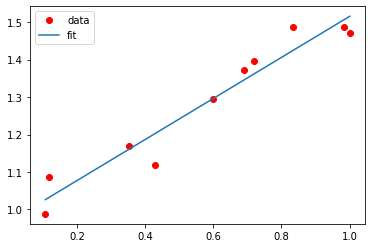

Bias of the estimator:  -0.0004513847370479773


In [83]:
def f_y(a,b,n,x):
    return a*x+b

def estimator(x,y,b):
    a = (np.sum(y-b)) / (np.sum(x))
    return a

n = 10
a = 0.5
b = 1
sigma_y = 0.05
sigma_x = 0.05

a_fit = np.zeros(1000)
b_fit = np.zeros(1000)
estim = np.zeros(1000)

for i in range(1000):
    
    gauss_noise_y = np.random.normal(loc = 0, scale = sigma_y, size = n)
    gauss_noise_x = np.random.normal(loc = 0, scale = sigma_y, size = n)
    x = np.random.uniform(low = 0, high = 1, size = n) + gauss_noise_x
    y = f_y(a,b,n,x) + gauss_noise_y
    
    a_fit[i], b_fit[i] = np.polyfit(x,y,1)
    
    estim[i] = estimator(x,y,b)

    if i == 500:
        A_fit = a_fit[i]
        B_fit = b_fit[i]
        X = x
        Y = y
    
plt.figure(2)
plt.plot(X,Y, 'ro', linestyle="None", label = 'data')
plt.plot(np.linspace(np.min(X), np.max(X), 1000), A_fit*np.linspace(np.min(X), np.max(X), 1000)+B_fit, label = 'fit')
plt.legend()
plt.show()

bias = np.mean(estim) - a

print('Bias of the estimator: ', bias)

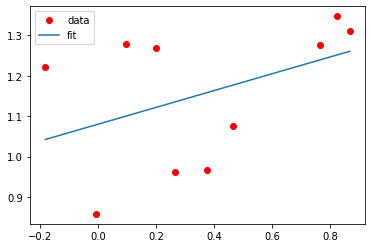

Bias of the estimator:  -0.006735910683817459


In [84]:
def f_y(a,b,n,x):
    return a*x+b

def estimator(x,y,b):
    a = (np.sum(y-b)) / (np.sum(x))
    return a

n = 10
a = 0.5
b = 1
sigma_y = 0.2
sigma_x = 0.2

a_fit = np.zeros(1000)
b_fit = np.zeros(1000)
estim = np.zeros(1000)

for i in range(1000):
    
    gauss_noise_y = np.random.normal(loc = 0, scale = sigma_y, size = n)
    gauss_noise_x = np.random.normal(loc = 0, scale = sigma_y, size = n)
    x = np.random.uniform(low = 0, high = 1, size = n) + gauss_noise_x
    y = f_y(a,b,n,x) + gauss_noise_y
    
    a_fit[i], b_fit[i] = np.polyfit(x,y,1)
    
    estim[i] = estimator(x,y,b)

    if i == 500:
        A_fit = a_fit[i]
        B_fit = b_fit[i]
        X = x
        Y = y
    
plt.figure(3)
plt.plot(X,Y, 'ro', linestyle="None", label = 'data')
plt.plot(np.linspace(np.min(X), np.max(X), 1000), A_fit*np.linspace(np.min(X), np.max(X), 1000)+B_fit, label = 'fit')
plt.legend()
plt.show()

bias = np.mean(estim) - a

print('Bias of the estimator: ', bias)

Higher gaussian errors for x and y lead to a wider spread of the data and to a larger value of the bias of the estimator.

Bias of the estimator:  0.0003219140444034041
Bias of the estimator:  -0.00021755464046308015
Bias of the estimator:  -0.0002446757532283961
Bias of the estimator:  8.199622091775716e-05
Bias of the estimator:  7.976749654858839e-05
Bias of the estimator:  -1.2455973199987369e-05
Bias of the estimator:  4.549428858380278e-05
Bias of the estimator:  2.1317014210708862e-05
Bias of the estimator:  -4.340735763108672e-06
Bias of the estimator:  9.330018425623976e-07
Bias of the estimator:  -6.239756925596751e-07


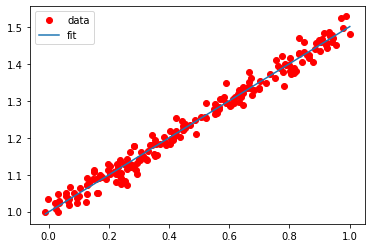

Estimator values for increasing n:  [0.48677398 0.48821045 0.50267172 0.49873823 0.4999135  0.50020024
 0.49881212 0.49970577 0.50000085 0.49992863 0.49999384]


In [85]:
def f_y(a,b,n,x):
    return a*x+b

def estimator(x,y,b):
    a = (np.sum(y-b)) / (np.sum(x))
    return a

n = np.array([10,20,50,100,200,500,1000,10000,50000, 100000,1000000])
Estim = np.zeros(len(n))

for k in range(len(n)):
    
    a = 0.5
    b = 1
    sigma_y = 0.02
    sigma_x = 0.02

    a_fit = np.zeros(1000)
    b_fit = np.zeros(1000)
    estim = np.zeros(1000)
    
    for i in range(1000):

        gauss_noise_y = np.random.normal(loc = 0, scale = sigma_y, size = n[k])
        gauss_noise_x = np.random.normal(loc = 0, scale = sigma_y, size = n[k])
        x = np.random.uniform(low = 0, high = 1, size = n[k]) + gauss_noise_x
        y = f_y(a,b,n[k],x) + gauss_noise_y

        a_fit[i], b_fit[i] = np.polyfit(x,y,1)

        estim[i] = estimator(x,y,b)

        if i == 500: 
            Estim[k] = estim[i]
            if k == 4:
                A_fit = a_fit[i]
                B_fit = b_fit[i]
                X = x
                Y = y
            
    bias = np.mean(estim) - a
    print('Bias of the estimator: ', bias)
    
plt.figure(4)
plt.plot(X,Y, 'ro', linestyle="None", label = 'data')
plt.plot(np.linspace(np.min(X), np.max(X), 1000), A_fit*np.linspace(np.min(X), np.max(X), 1000)+B_fit, label = 'fit')
plt.legend()
plt.show()

print('Estimator values for increasing n: ', Estim)

The estimator seems to be asymptotically unbiased as the bias is decreasing with increasing number of n. Also a check of some randomly picked estimator values shows that the estimator tends to the true value of a for n -> infinity, so the estimator appears to be consistent.